In [1]:
from agents import Agent, AgentGraphManager, AgentType, AgentRelation, RelationType

In [2]:
supervisor = Agent(
    id='1',
    agent_type=AgentType.SUPERVISOR,
    system_prompt="You supervise a team whose job it is to solve climate change.",
    relationships=[]
)

web_researcher = Agent(
    id='2',
    agent_type=AgentType.WEB_RESEARCHER,
    system_prompt="You are a climate change researcher who gathers high quality academic articles information and data pertinent to climate change.",
    relationships=[
        AgentRelation(
            from_agent='2',
            to_agent='1',
            relation_type=RelationType.REPORTS_TO
        )
    ])

data_scientist = Agent(
    id='3',
    agent_type=AgentType.DATA_SCIENTIST,
    system_prompt="You are an expert data scientist whose job it is to analyze and visualise data relating to climate change to help the team solve problems.",
    relationships=[
        AgentRelation(
            from_agent='3',
            to_agent='1',
            relation_type=RelationType.REPORTS_TO
        )
    ])

agents = [supervisor, web_researcher, data_scientist]

In [3]:
graph_manager = AgentGraphManager()

for agent in agents:
    graph_manager.add_agent(agent)

In [4]:
print(graph_manager.agents)

{'1': Agent(id='1', agent_type=<AgentType.SUPERVISOR: 'supervisor'>, system_prompt='You supervise a team whose job it is to solve climate change.', relationships=[], tools=[]), '2': Agent(id='2', agent_type=<AgentType.WEB_RESEARCHER: 'web_researcher'>, system_prompt='You are a climate change researcher who gathers high quality academic articles information and data pertinent to climate change.', relationships=[AgentRelation(from_agent='2', to_agent='1', relation_type=<RelationType.REPORTS_TO: 'reports_to'>)], tools=[TavilySearchResults(api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********')))]), '3': Agent(id='3', agent_type=<AgentType.DATA_SCIENTIST: 'data_scientist'>, system_prompt='You are an expert data scientist whose job it is to analyze and visualise data relating to climate change to help the team solve problems.', relationships=[AgentRelation(from_agent='3', to_agent='1', relation_type=<RelationType.REPORTS_TO: 'reports_to'>)], tools=[StructuredTool(name='pyt

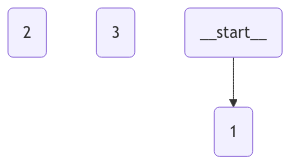

In [5]:
from IPython.display import display, Image

display(Image(graph_manager.graph.get_graph().draw_mermaid_png()))

In [6]:
task  = "What are the top 3 contibutors to climate change in New Zealand currently?"

for s in graph_manager.graph.stream(
            {"messages": [("user", task)]},
            stream_mode=["values", "debug"],
            debug=True
        ):
    print(s)
    print("----")

[-1:checkpoint] State at the end of step -1:
{'messages': []}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'messages': [('user',
               'What are the top 3 contibutors to climate change in New '
               'Zealand currently?')]}
[0:writes] Finished step 0 with writes to 1 channel:
- messages -> [('user',
  'What are the top 3 contibutors to climate change in New Zealand currently?')]
[0:checkpoint] State at the end of step 0:
{'messages': [HumanMessage(content='What are the top 3 contibutors to climate change in New Zealand currently?', additional_kwargs={}, response_metadata={}, id='213f0741-155d-4765-8276-bd8e8d4d37e3')]}
[1:tasks] Starting 1 task for step 1:
- 1 -> {'messages': [HumanMessage(content='What are the top 3 contibutors to climate change in New Zealand currently?', additional_kwargs={}, response_metadata={}, id='213f0741-155d-4765-8276-bd8e8d4d37e3')]}
('values', {'messages': [HumanMessage(content='What are the top 3 contibutors to climate change in 